# Style Transfer with Convolutional Neural Networks

In [432]:
import torchvision.models as models
import torch
import numpy as np
import torch.nn as nn
import utils as U;reload(U)
from torch.autograd import Variable
import torch.optim as optim
import torch.autograd as autograd
import matplotlib.pyplot as plt
import pdb

%matplotlib inline

In [433]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False

# Loss functions

In [434]:
vgg = models.vgg16(pretrained=True)
mse = nn.MSELoss()

## Content Loss

### Content Image

torch.Size([3, 224, 224])


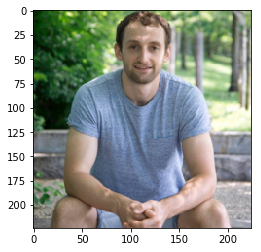

In [435]:
content_image = U.get_image(3, None)
print(content_image.size())
U.imshow(content_image)

In [494]:

#all conv indexes [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]
selected_convolutional_indexes = [19]
module_lists = [list(vgg.features.children())[:index+1] for index in  selected_convolutional_indexes]
content_models = [ U.convert_to_average_pooling(modules) for modules in module_lists ]

def content_loss(model, prediction, content_image, weight):
    pred = model.forward(prediction.unsqueeze(0))
    target = model.forward(content_image.unsqueeze(0))
    return mse(pred, target)

def content_loss_and_gradients(gen_img, content_image, weight):
    return  sum([ content_loss(model, gen_img, content_image, weight) for model in content_models ])

## Style Loss

### Style Image

torch.Size([3, 224, 224])


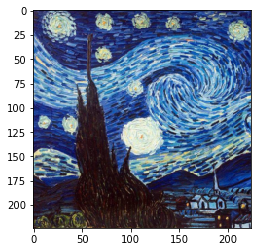

In [471]:
style_image = U.get_image(5, None, 112)
print(style_image.size())
U.imshow(style_image)

In [472]:
#all conv indexes [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]
selected_convolutional_indexes = [2, 7, 12, 19, 26, 28]
module_lists = [list(vgg.features.children())[:index+1] for index in  selected_convolutional_indexes]
conv_layer_models = [ U.convert_to_average_pooling(modules) for modules in module_lists ]

In [495]:
def gram_matrix(x):
    batch_size = x.size()[0]
    height  = x.size()[1]
    width = x.size()[2]
    chan = x.size()[3]
    flattened_channels = x.resize(batch_size, chan, width * height)

    g_matrix = flattened_channels[0].matmul(flattened_channels[0].transpose(1,0)).unsqueeze(0) 
    return g_matrix

def style_loss(model, prediction, style_image_layer, weight):
    pred = model.forward(prediction.unsqueeze(0))
    target = model.forward(style_image_layer.unsqueeze(0))
    return weight * (mse(gram_matrix(pred), gram_matrix(target))  / (pred.nelement()))

model_weights = [0.02, 0.2, 0.2,0.25, 0.3]
def style_loss_and_gradients(gen_image, style_image):
    style_image = Variable(style_image, requires_grad = False)
    return sum([style_loss(model, gen_image, style_image, weight) for model, weight in zip(conv_layer_models, model_weights) ])

# Minimize noise based on vgg output

In [496]:
from scipy.optimize import fmin_l_bfgs_b 

In [497]:
class StyleTransfer():
    def __init__(self, style_image, content_image):
        self.style_image = style_image
        self.content_image = content_image
        self.count = 0 
        self.gradient_mag_diff = 1
                
    def loss_fn(self, flattened_image):
        self.count += 1
        predicted_image = torch.Tensor(flattened_image.reshape(content_image.size()))
        prediction = Variable(predicted_image, requires_grad = True)
        
        c_loss = content_loss_and_gradients(prediction, self.content_image, self.gradient_mag_diff)
        s_loss = style_loss_and_gradients(prediction, self.style_image)
        total_loss = c_loss + s_loss
        total_loss.backward()
        prediction.grads
        threshold = 100
        if self.count % 5 == 0:
            print("s_loss ", int(s_loss))
            print("c_loss ", int(c_loss))
            print("Content weights", 1)
        return s_loss + c_loss,  style_gradients + content_gradients

In [498]:
noise_tensor = torch.rand(3,224, 224) - 0.5
import pdb
def transfer_style(transfer_class, maxfun, iters, starting_image):
    gen_image = starting_image.numpy().flatten()
    for i in range(iters):
        generated_image, min_val, y = fmin_l_bfgs_b(transfer_class.loss_fn, gen_image, maxfun=maxfun)
        print("Epoch "+str(i) + " Loss: " +str(min_val))
        gen_image = generated_image
    return gen_image

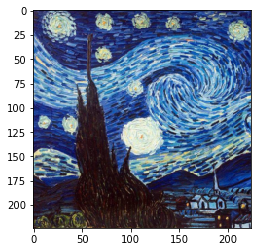

In [499]:
U.imshow(style_image)

In [500]:
result = transfer_style(StyleTransfer(style_image, Variable(content_image)), 20, 1, noise_tensor)

ValueError: need more than 1 value to unpack

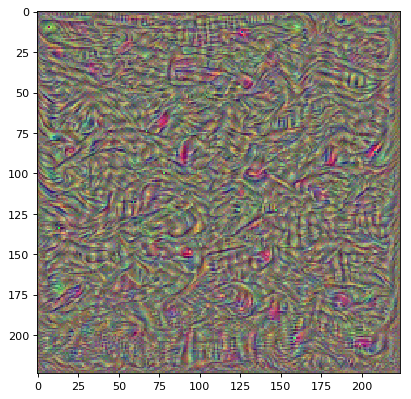

In [479]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
U.imshow(torch.Tensor(result.reshape(content_image.size())))

In [446]:
result = transfer_style(StyleTransfer(style_image, Variable(content_image)), 20, 3, torch.Tensor(result))

('s_loss ', 84)
('c_loss ', 70)
('Content weights', 10)


KeyboardInterrupt: 

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
U.imshow(torch.Tensor(result.reshape(content_image.size())))

In [ ]:
result = transfer_style(StyleTransfer(style_image, Variable(content_image)), 20, 3, torch.Tensor(result))

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
U.imshow(torch.Tensor(result.reshape(content_image.size())))

In [ ]:
result = transfer_style(StyleTransfer(style_image, Variable(content_image)), 20, 3, torch.Tensor(result))

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
U.imshow(torch.Tensor(result.reshape(content_image.size())))

In [ ]:
result = transfer_style(StyleTransfer(style_image, Variable(content_image)), 20, 3, torch.Tensor(result))

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
U.imshow(torch.Tensor(result.reshape(content_image.size())))

In [ ]:
result = transfer_style(StyleTransfer(style_image, Variable(content_image)), 20, 3, torch.Tensor(result))

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
U.imshow(torch.Tensor(result.reshape(content_image.size())))